In [1]:
import numpy as np # linear algebra
import pandas as pd # # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("C:/Users/vsubramanian/Desktop/Python/Data/ML Projects/Linear Regression/input"))
# Any results you write to the current directory are saved as output.

['Ecommerce Customers', 'Online_Sales.csv', 'TSLA.csv']


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Stock = pd.read_csv('C:/Users/vsubramanian/Desktop/Python/Data/ML Projects/Linear Regression/input/TSLA.csv')

In [4]:
Stock.head()

Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900

In [5]:
Stock.describe()

Open         High          Low        Close    Adj Close  \
count  2416.000000  2416.000000  2416.000000  2416.000000  2416.000000   
mean    186.271147   189.578224   182.916639   186.403651   186.403651   
std     118.740163   120.892329   116.857591   119.136020   119.136020   
min      16.139999    16.629999    14.980000    15.800000    15.800000   
25%      34.342498    34.897501    33.587501    34.400002    34.400002   
50%     213.035004   216.745002   208.870002   212.960007   212.960007   
75%     266.450012   270.927513   262.102501   266.774994   266.774994   
max     673.690002   786.140015   673.520020   780.000000   780.000000   

             Volume  
count  2.416000e+03  
mean   5.572722e+06  
std    4.987809e+06  
min    1.185000e+05  
25%    1.899275e+06  
50%    4.578400e+06  
75%    7.361150e+06  
max    4.706500e+07

In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

# Stock Analysis
### Let's explore the data!

For the rest of the exercise we'll only be using the numerical data of the csv file.

> Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?

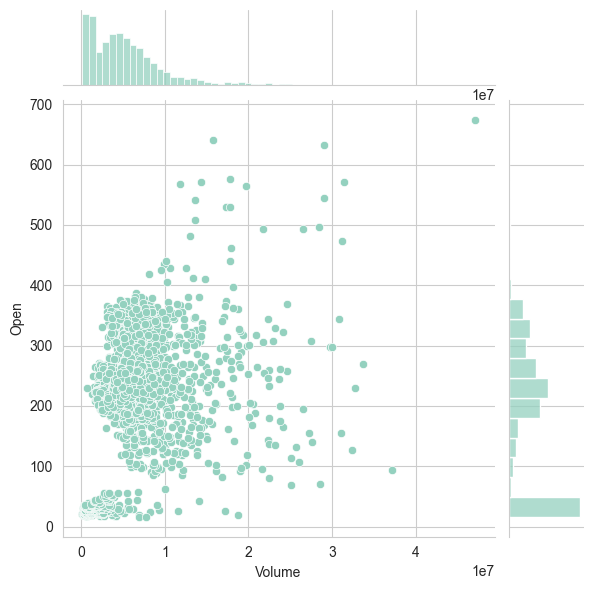

In [7]:
sns.jointplot(x='Volume',y='Open',data=Stock)

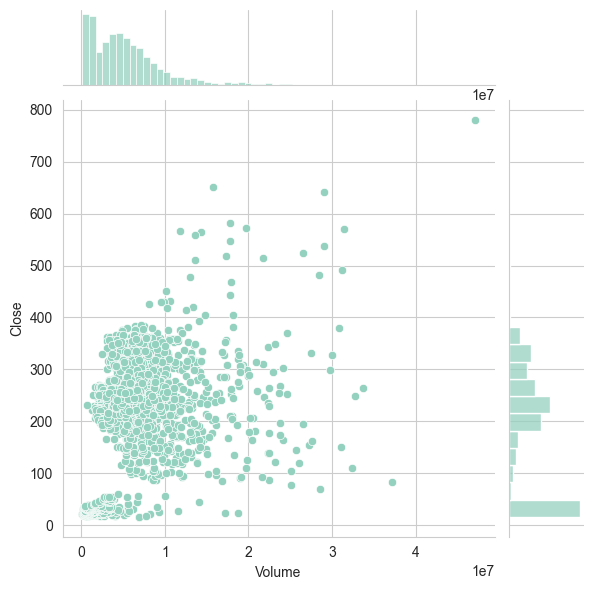

In [8]:
sns.jointplot(x='Volume',y='Close',data=Stock)

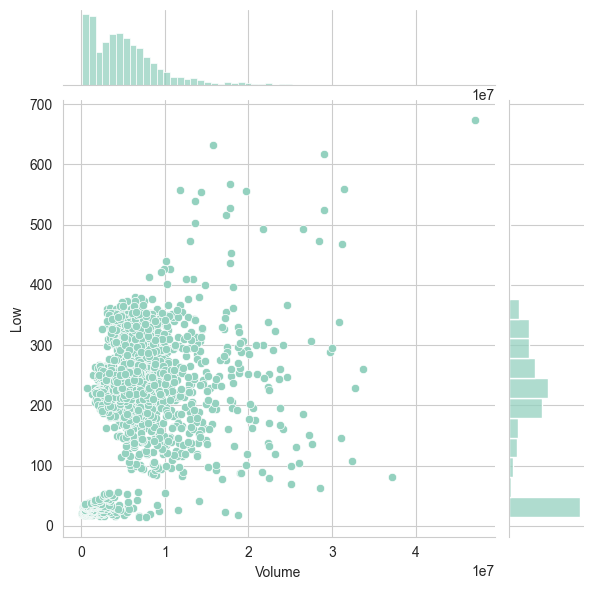

In [9]:
sns.jointplot(x='Volume',y='Low',data=Stock)

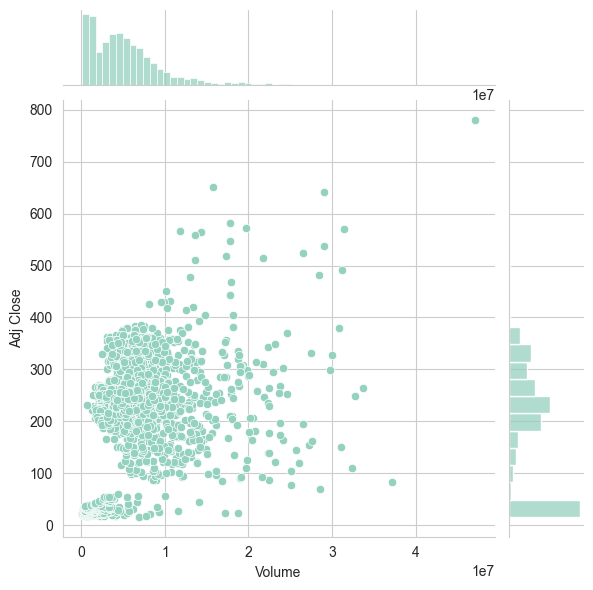

In [10]:
sns.jointplot(x='Volume',y='Adj Close',data=Stock)

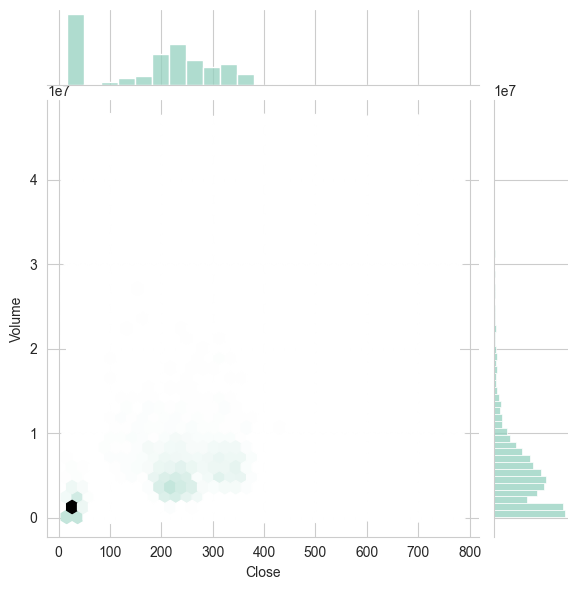

In [11]:
sns.jointplot(x='Close',y='Volume',kind="hex",data=Stock)

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


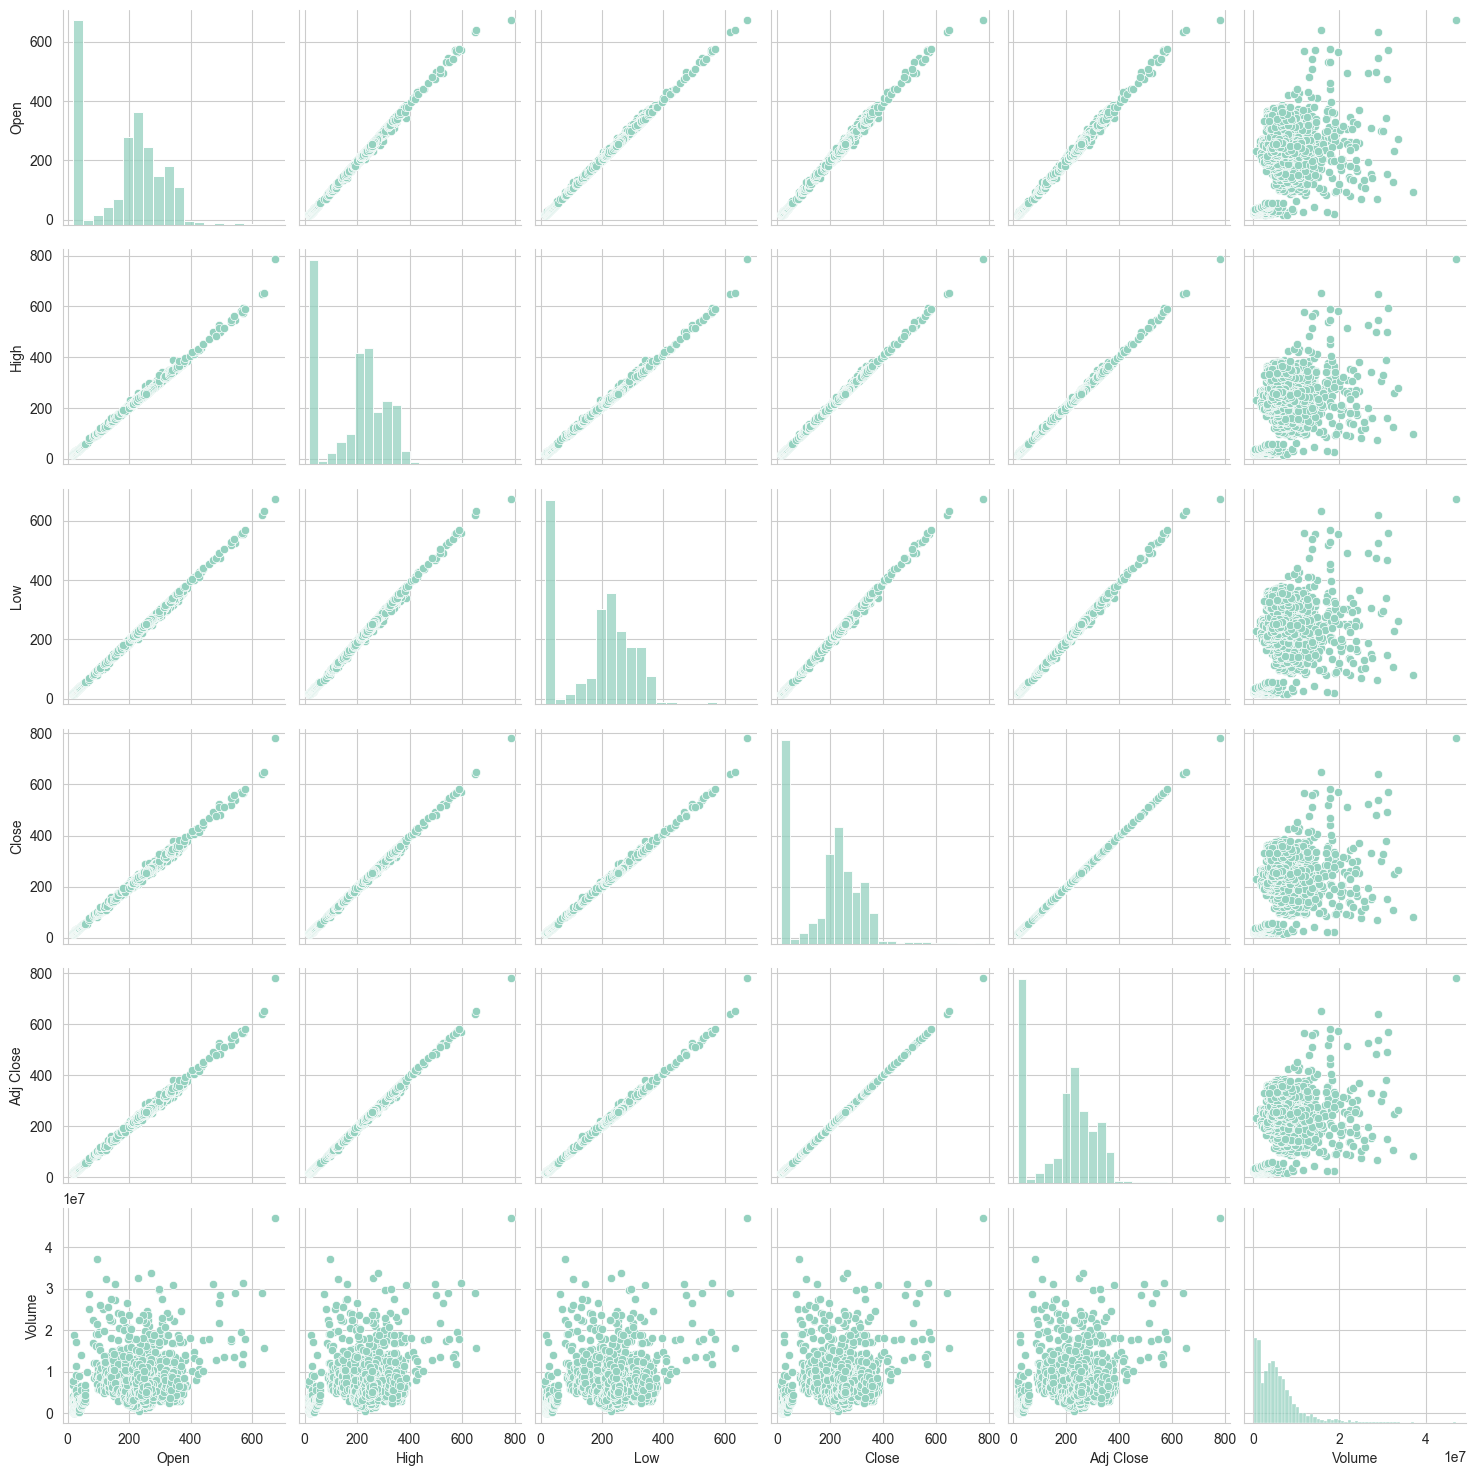

In [12]:
sns.pairplot(Stock)

<Axes: xlabel='Close', ylabel='Volume'>

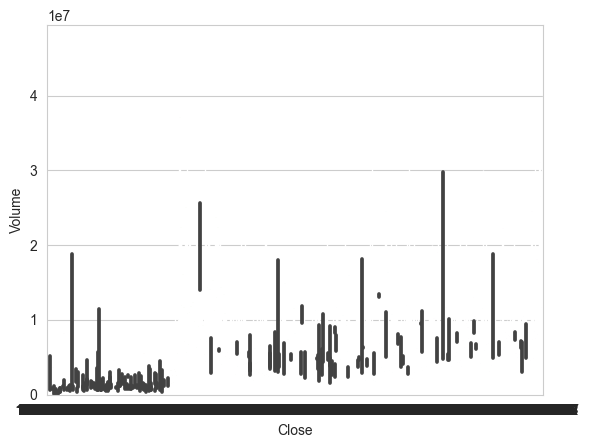

In [13]:
sns.barplot(x = 'Close',  y = 'Volume', data = Stock)

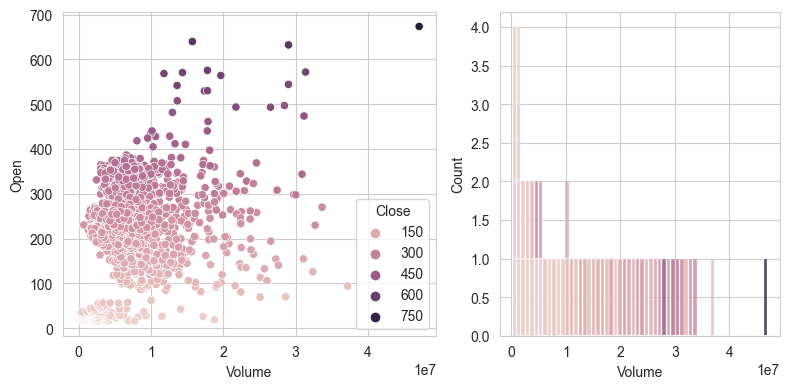

In [14]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=Stock, x="Volume", y="Open", hue="Close", ax=axs[0])
sns.histplot(data=Stock, x="Volume", hue="High", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


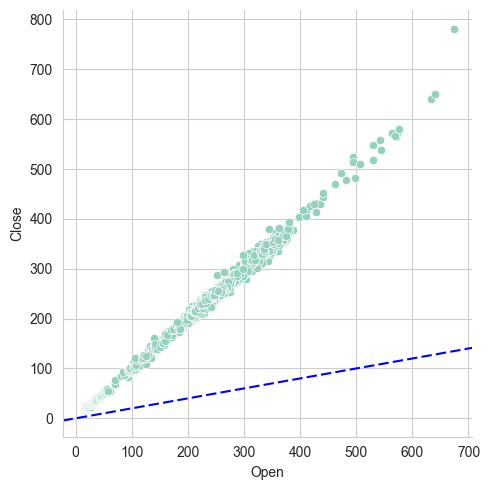

In [15]:
g = sns.relplot(data=Stock, x="Open", y="Close")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


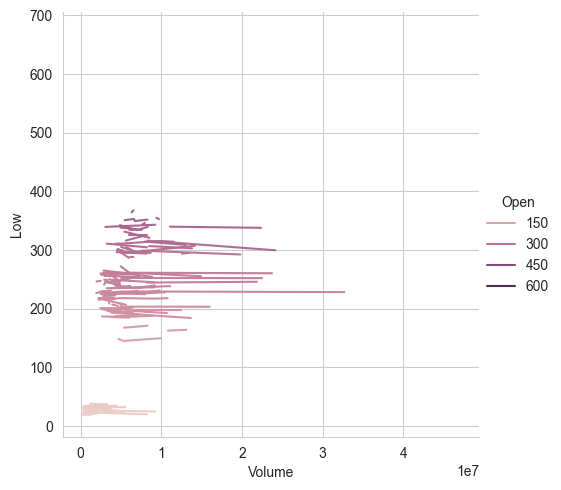

In [16]:
sns.relplot(data=Stock, x="Volume", y="Low", hue="Open", kind="line")

In [17]:
import seaborn.objects as so

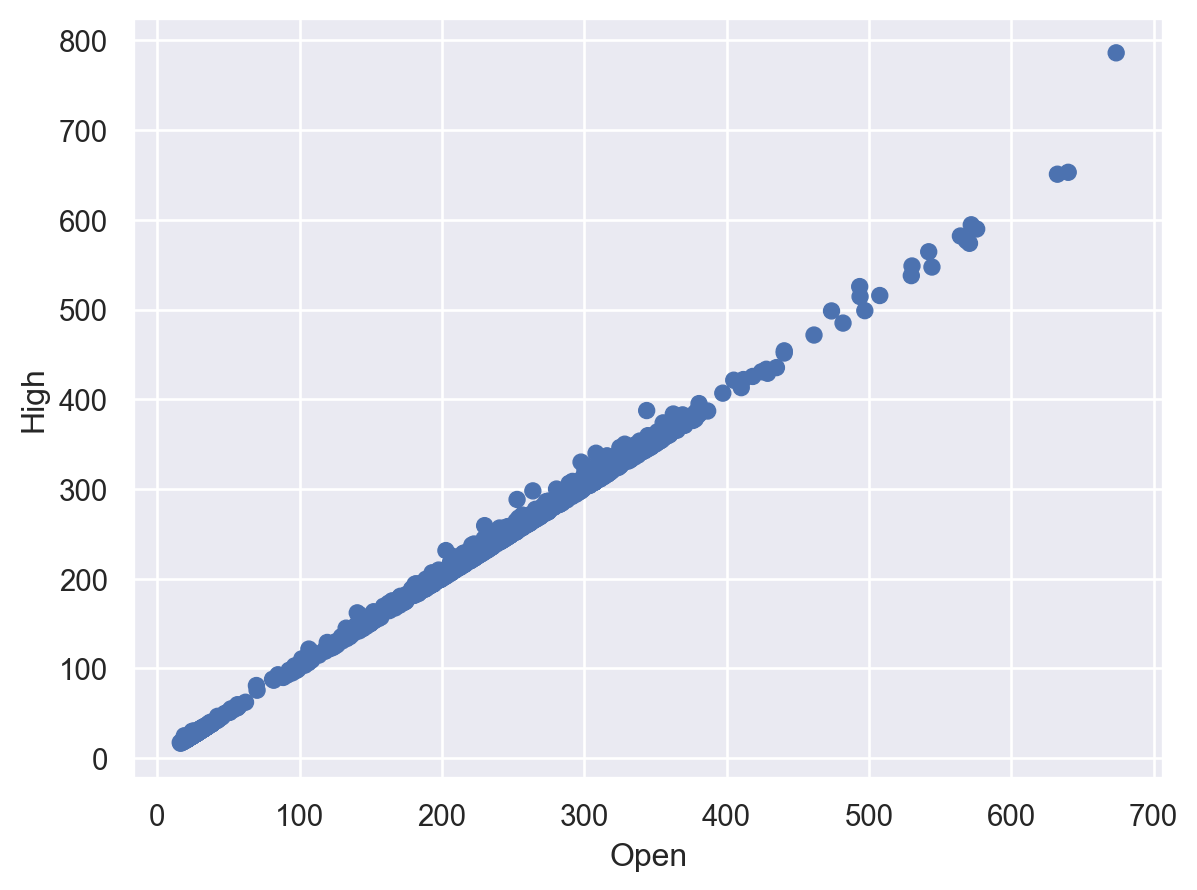

In [18]:
(
    so.Plot(Stock, x="Open", y="High")
    .add(so.Dot())
)

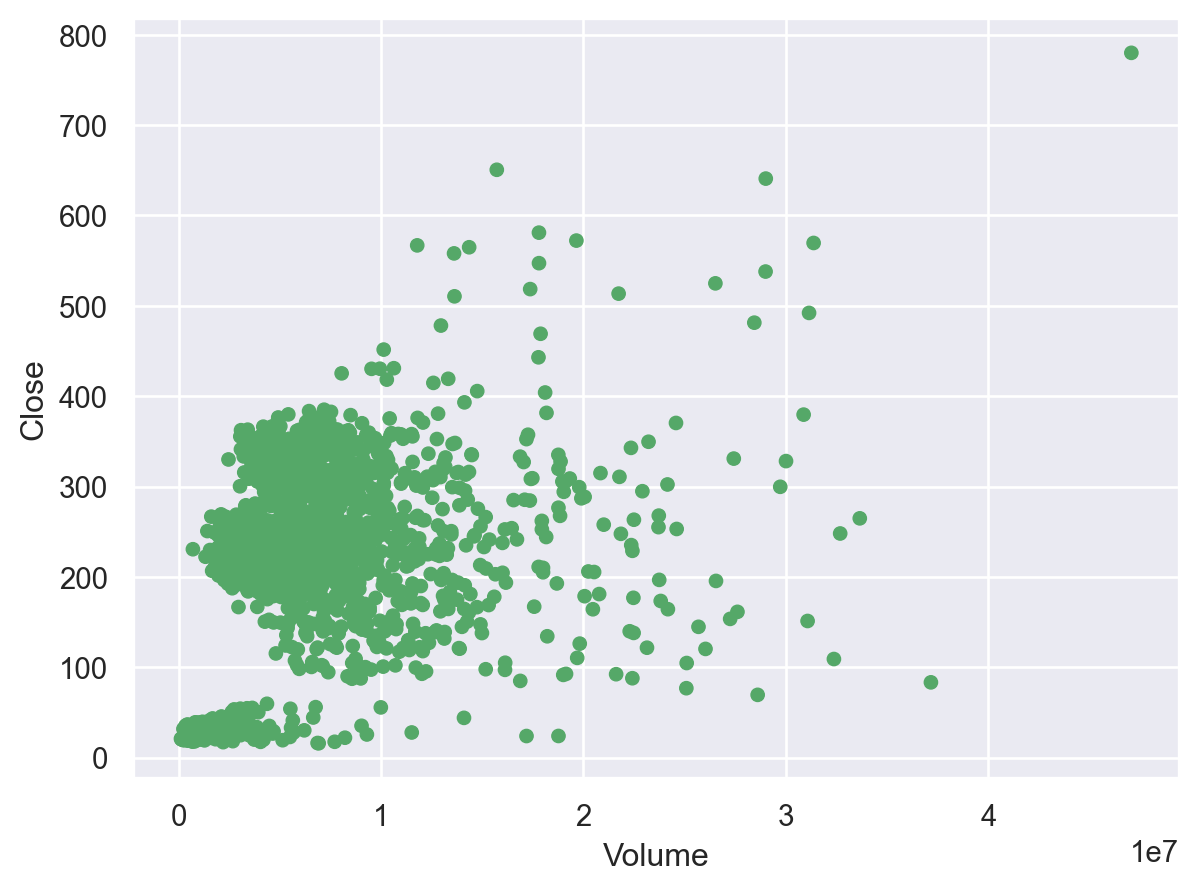

In [19]:
(
    so.Plot(Stock, x="Volume", y="Close")
    .add(so.Dot(color="g", pointsize=5))
)

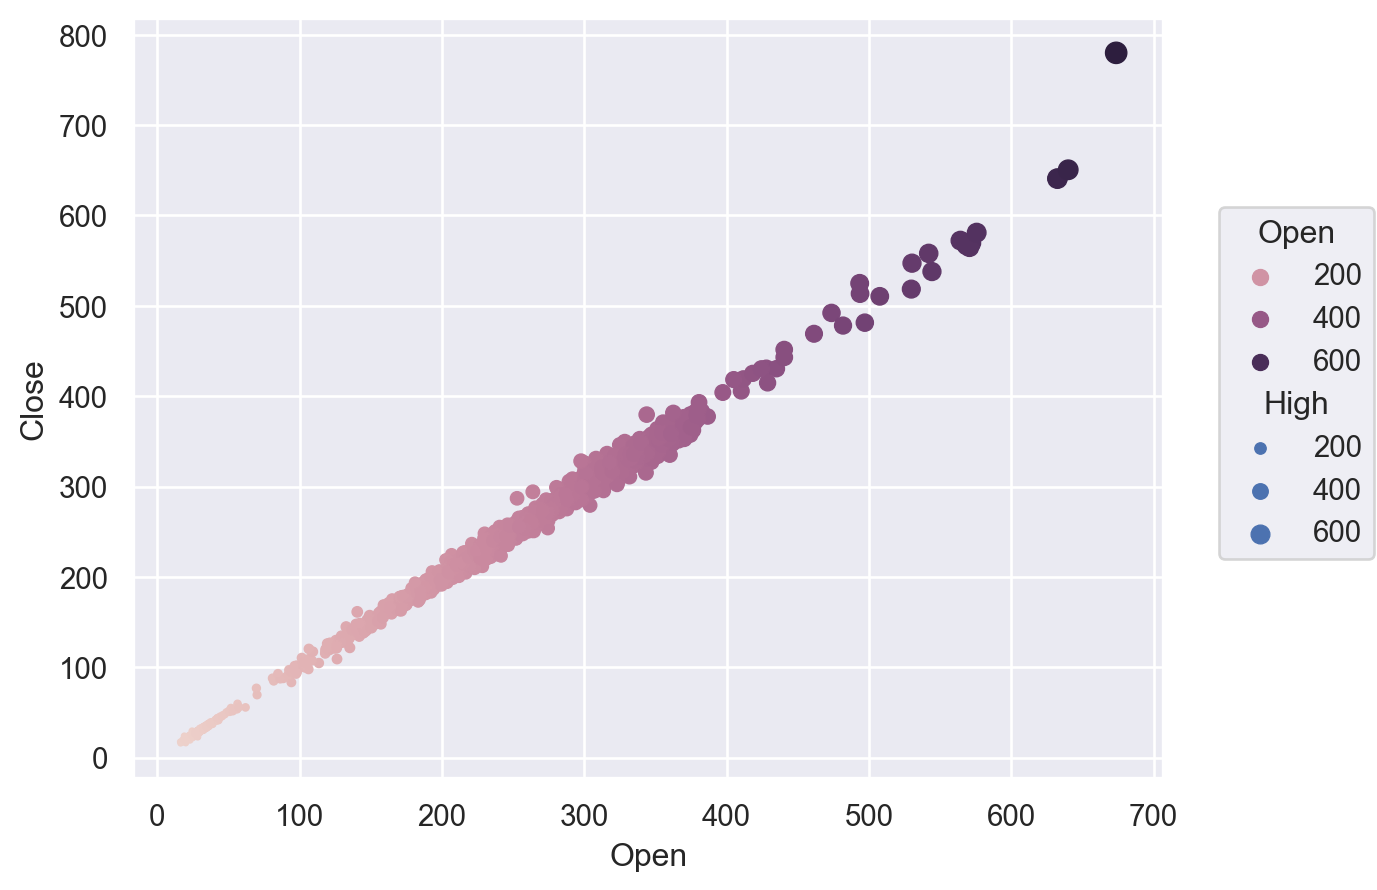

In [20]:
(
    so.Plot(
        Stock, x="Open", y="Close",
        color="Open", pointsize="High",
    )
    .add(so.Dot())
)

#### Create a linear model plot (using seaborn's lmplot) of Stock vs. Volume

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


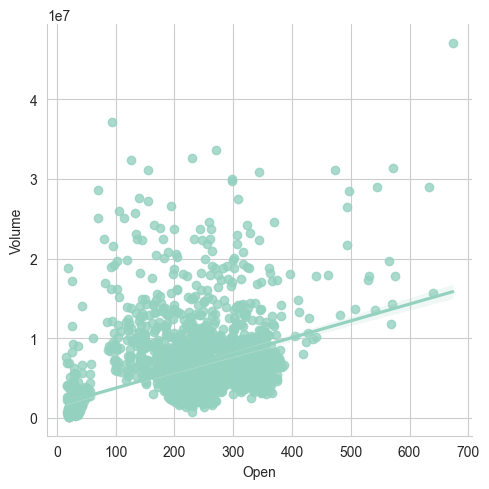

In [21]:
sns.lmplot(x='Open',y='Volume',data=Stock)

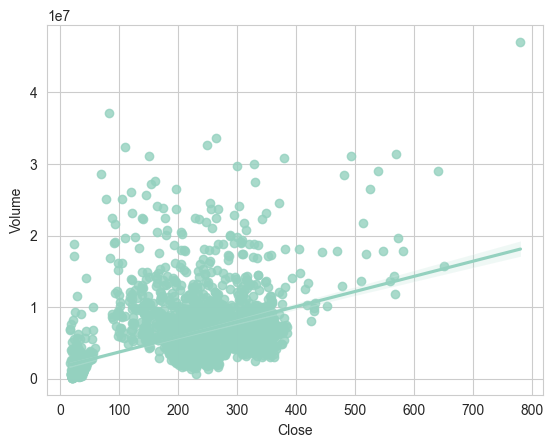

In [22]:
sns.regplot(x="Close", y="Volume", data=Stock);

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


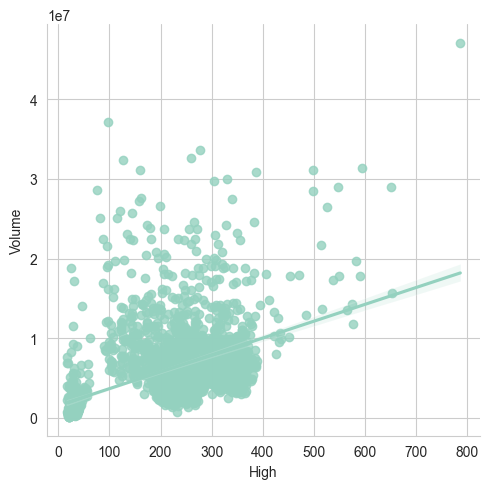

In [23]:
sns.lmplot(x="High", y="Volume", data=Stock);


c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


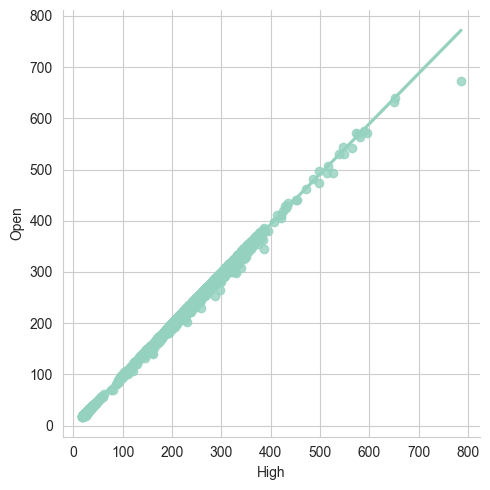

In [24]:
sns.lmplot(x="High", y="Open", data=Stock, x_jitter=.15);

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


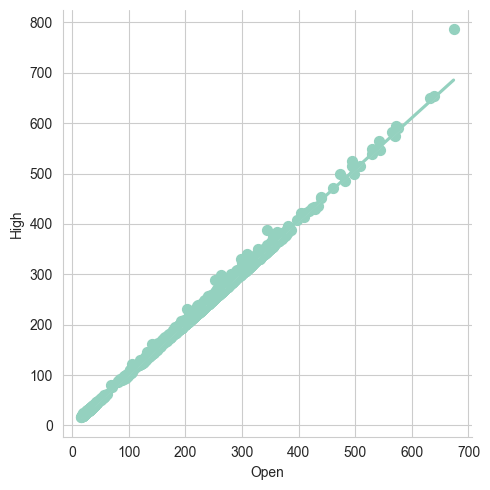

In [25]:
sns.lmplot(x="Open", y="High", data=Stock, x_estimator=np.mean);

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


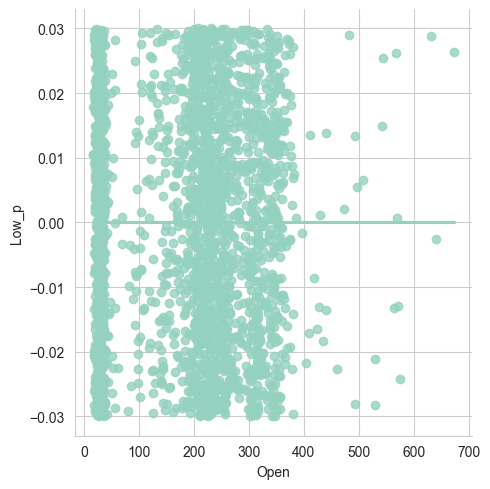

In [26]:
Stock["Low_p"] = (Stock.Low / Stock.Volume) > .15
sns.lmplot(x="Open", y="Low_p", data=Stock,
           y_jitter=.03);

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\anaconda3\envs\DataScience\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\anaconda3\envs\DataScience\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\anaconda3\envs\DataScience\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\anaconda3\envs\DataScience\Lib\site-packages\statsmod

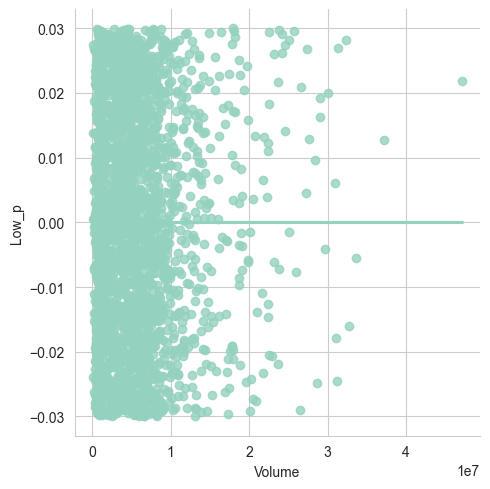

In [27]:
sns.lmplot(x="Volume", y="Low_p", data=Stock,
           logistic=True, y_jitter=.03);

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


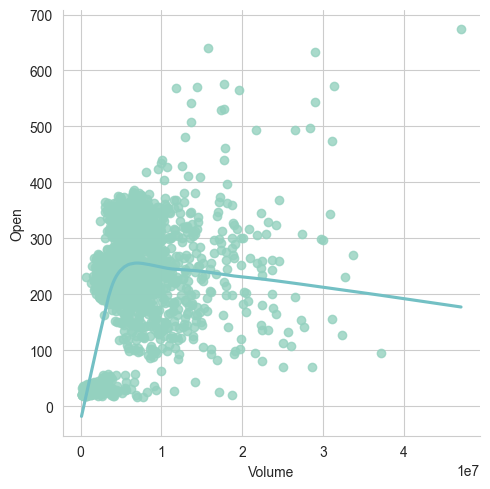

In [28]:
sns.lmplot(x="Volume", y="Open", data=Stock,
           lowess=True, line_kws={"color": "C1"});

### Training and Testing Data
Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. Set a variable X equal to the numerical features of the customers and a variable y equal to the "Volume" column.

In [29]:
X = Stock[['Open','High','Low','Close']]

In [30]:
Y = Stock['Volume']

> ### Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101 

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

## Training the Model
Now its time to train our model on our training data!

Import LinearRegression from sklearn.linear_model

In [34]:
from sklearn.linear_model import LinearRegression

> ### Create an instance of a LinearRegression() model named lm.

In [35]:
lm = LinearRegression()

#### Train/fit lm on the training data.

In [36]:
lm.fit(X_train,y_train)

LinearRegression()

Print out the coefficients of the model

In [37]:
lm.coef_

array([  29120.55883215,  684505.28438524, -630729.97642154,
        -84677.86535687])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

Use lm.predict() to predict off the X_test set of the data.

In [38]:
predictions = lm.predict(X_test)

Create a scatterplot of the real test values versus the predicted values.

Text(0, 0.5, 'Predicted Y')

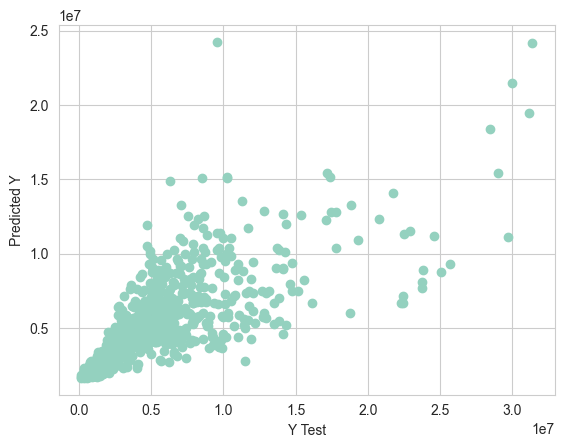

In [39]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

> #### Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas

In [41]:
from sklearn import metrics

In [42]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE :   2199446.1293981276
MSE :   11522388344101.473
RMAE :   3394464.3677760814


#### Residuals
You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

#### Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

C:\Users\vsubramanian\AppData\Local\Temp\ipykernel_19412\3462226243.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - predictions,bins=50)


<Axes: xlabel='Volume', ylabel='Density'>

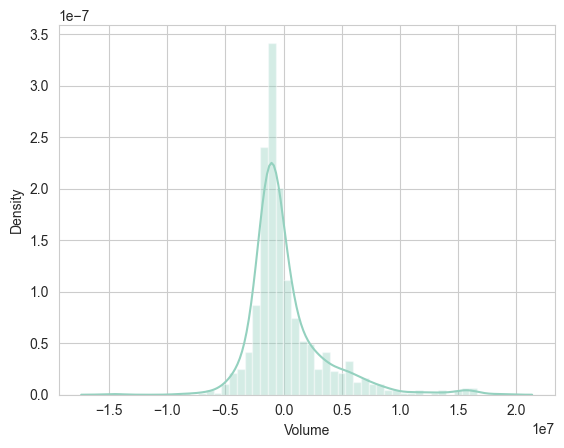

In [43]:
sns.distplot(y_test - predictions,bins=50)

We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

Recreate the dataframe below.

In [46]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Coeffecient
Open    29120.558832
High   684505.284385
Low   -630729.976422
Close  -84677.865357